<a href="https://colab.research.google.com/github/emilyclifton/ML-Mushrooms/blob/main/mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mushroom Edibility

_Emily Clifton_

## Background
###Introduction
Mushrooms are a diverse group of fungi that have been apart of human diets and traditional medicines for centuries. The vast array of mushroom spieces presents both culinary delights and potential dangers, with certain mushrooms being highly toxic and even lethal if consummed. In this context, the ability to accurately identify whether a mushroom is edible or poisonous becomes paramount for the health of individuals who forage for mushrooms. Hopefully, with Machine Learning Algorithms this project will enchance the accuracy and efficiency of mushroom edibility classification.

###Literature Review
Historically, the identification of edible and poisonous mushrooms has relied on traditional knowledge passed down through generations. However, the limitations of this approach have become increasingly evident, prompting researchers to explore alternative methods. Previous literature has explored various techniques, including field guides, morphological characteristics, and chemical analyses, to distiguish between edible and poisonous mushrooms. Moreover, recent advancements in machine learning have offered new possibilities for automating and imporoving the accuracy of this classification process.

###Research Gaps
Despite the progress in traditional methods and the field of machine learning, there exists a notable research gap in developing robust models for mushroom edibility classification. The challenge lies in the dataset structure, where each mushroom species is labeled as definitely edible, definitely poisonous, or of unkown edibility and not recommended. The amalgamation of the "unkown edibility" class with the "poisonous" class introduces ambiguity, making it difficult to establish clear rules for identifying poisonous mushrooms based on available signs. This research gap calls for innovative approaches to address the inherent complexities within the dataset and improve the accuracy of edibility predictions.

###Challenges
One of the primary challenges in this project is navigating the dataset's classification nuances. The absence of distinct rules for identifying poisonous mushrooms poses a unique obstacle. Machine learning models must grapple with the uncertainty associated with the "unknown edibility" class, requiring strategies to enhance classification accuracy and mitigate the risks associated with false positives or false negatives. Overcoming these challenges is crucial to developing a reliable and practical tool for mushroom enthusiasts, foragers, and researchers alike.



## Project Description
###Project Topic
This project aims to develop a machine learning model for the accurate classification of mushroom edibility. The dataset comprises descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms within the Agaricus and Lepiota Family. The challenge lies in effectively classifying these samples as definitely edible (e), definitely poisonous (p), or of unknown edibility and not recommended (combined with poisonous).

###Methodology
Employing advanced classification algorithms, such as neural networks or decision trees, the machine learning approach takes into account detailed descriptions of hypothetical samples. Variables such as cap shape, cap color, odor, gill size, and others derived from these descriptions contribute to the model's accuracy. Special attention is given to handling the "unknown edibility" class, taking into consideration the unique characteristics of the Agaricus and Lepiota Family samples.

###Data Resources
The dataset from the UC Irvine Machine Learning Repository provides comprehensive descriptions of hypothetical samples from 23 species of gilled mushrooms. Variables such as cap shape (bell, conical, convex, flat, knobbed, sunken), cap color (brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow), and others offer detailed insights into the morphological and chemical features of each mushroom species.
https://archive.ics.uci.edu/dataset/73/mushroom


###Anticipated Outcomes
The anticipated outcomes include the development of a robust machine learning model capable of accurately classifying mushrooms within the Agaricus and Lepiota Family. Performance evaluation metrics, such as precision, recall, and F1 score, will provide a comprehensive assessment of the model's effectiveness. The analysis of specific variables derived from the hypothetical samples will contribute to a nuanced understanding of the features influencing mushroom edibility.

##Performance Metrics:

| Metric | Mathematical Expression | Explanation |
| ---------- | ----------- | ----------- |
| $Accuracy$ | $= \dfrac{TP+TN}{TP+TN+FP+FN}$ | Measures the overall correctness of the model. |
| $Precision$ | $= \dfrac{TP}{TP+FP}$ | Evaluates the accuracy of positive predictions. |
| $Recall$ | $= \dfrac{TP}{TP+TN}$ | Assesses the model's ability to identify positive instances. |
| $F1$ | $= \dfrac{2\cdot Precision\cdot Recall}{Precision+Recall}$ | Provides a balanced measure that considers both false positives and false negatives. |
| $AUC-ROC$ | Area under the Receiver Operating Characteristic | Measures the model's ability to distiguish between edible and posionous. |

# Load Data

## Python Imports

In [361]:
# install the ucimlrepo package
!pip install ucimlrepo
!pip install scikit-learn-intelex

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# import scikit modules
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import config_context
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc, precision_recall_curve

> Read dataset from ucimlrepo

In [362]:
# fetch mushroom dataset from UCI repo
mushroom_data = fetch_ucirepo(id=73)

# load dataset into pandas df
# X = mushroom.data.features
# y = mushroom.data.targets

X = pd.DataFrame(mushroom_data.data.features, columns=mushroom_data.feature_names)
y = pd.DataFrame(mushroom_data.data.targets, columns=mushroom_data.target_names)

# display(X.head())
# display(y.head())

mushrooms = pd.concat([X, y], axis=1)

display(mushrooms.head())
mushrooms.info()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

## Clean Up Data

Remove and misisng data that can interfere with out models.

In [363]:
mushrooms.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [364]:
# Replace '?' with NaN to represent missing values
mushrooms['stalk-root'].replace('?', pd.NA, inplace=True)

# Find the most frequent category (mode) in the 'stalk-root' feature
most_frequent_category = mushrooms['stalk-root'].mode()[0]

# Replace missing values with the most frequent category
mushrooms['stalk-root'].fillna(most_frequent_category, inplace=True)

print(mushrooms.shape, "\n")

mushrooms.isna().sum()

(8124, 23) 



cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64

Remove any unneccisary features that cost GPU.

In [365]:
mushrooms.nunique()

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
poisonous                    2
dtype: int64

In [366]:
mushrooms = mushrooms.drop(columns=['veil-type'])

print(mushrooms.shape, "\n")

mushrooms.nunique()

(8124, 22) 



cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
poisonous                    2
dtype: int64

# Exploratory Data Analysis

### 1. Distribution of Edible and Poisonous Mushrooms:
- What is the overall percentage of edible mushrooms in the dataset?
- The primary goal is to understand the overall distribution of edible and poisonous mushrooms in the dataset. This will provide insights into the balance between the two classes and set the foundation for further analysis.

Percentage of Edible Mushrooms: 51.80%


Text(0.5, 1.0, 'Distribution of Mushrooms Across Habitats')

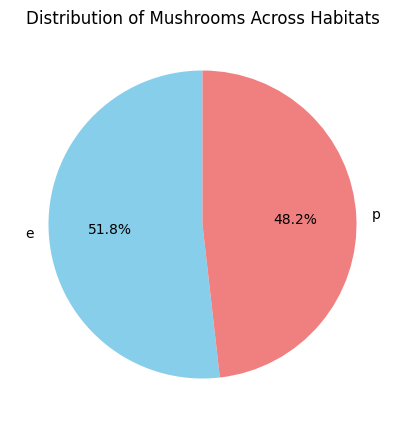

In [25]:
# Calculate the overall percentage of edible mushrooms
edible = mushrooms['poisonous'].value_counts()
edible_percentage = edible / len(mushrooms['poisonous']) * 100
print(f"Percentage of Edible Mushrooms: {edible_percentage.get('e', 0):.2f}%")

plt.rcParams["figure.figsize"] = [5,5]

# Plotting a pie chart
plt.pie(edible, labels=edible.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightyellow', 'lightgrey', 'lightblue'])
plt.title('Distribution of Mushrooms Across Habitats')

__Answer__: The dataset has a balanced distribution of edible and poisonous mushrooms, with approximately 51.8% being edible.

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


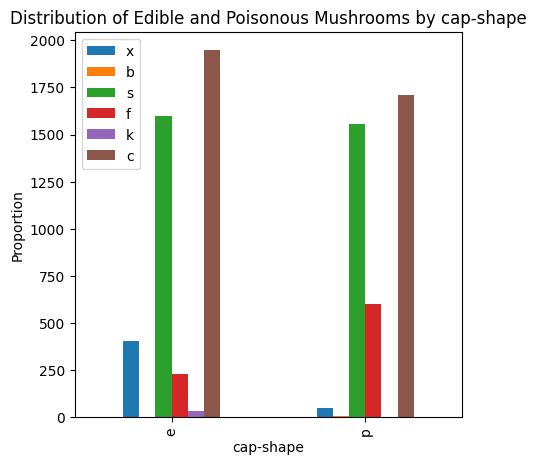

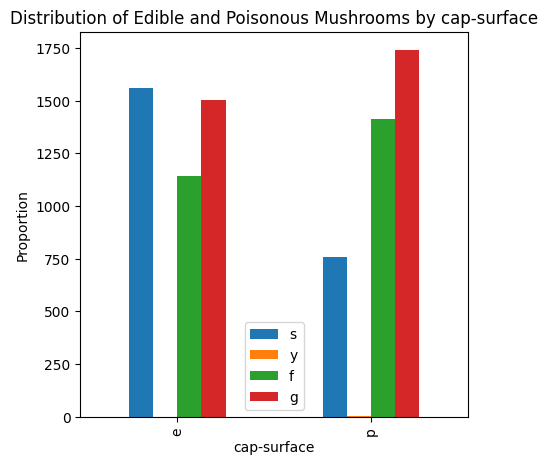

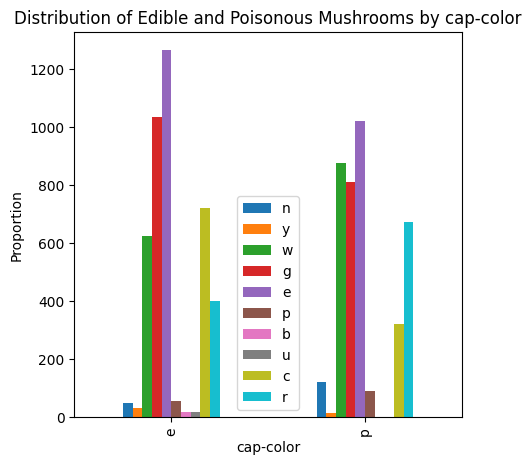

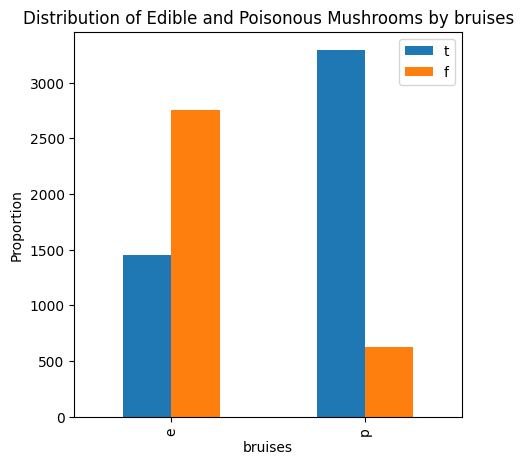

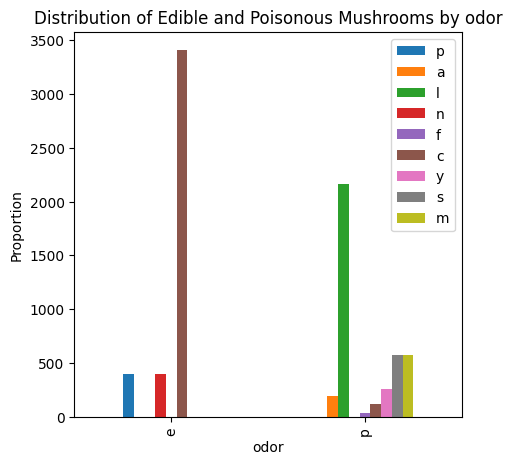

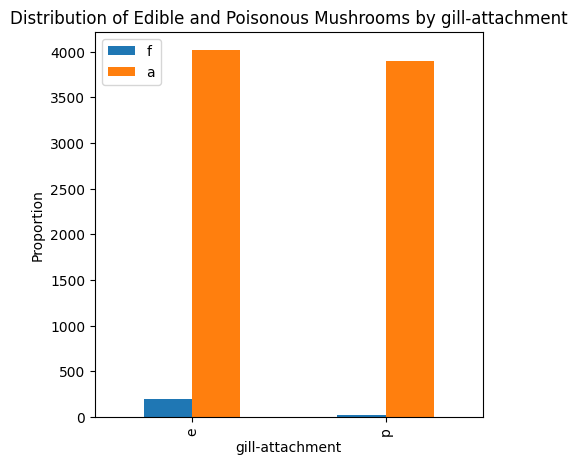

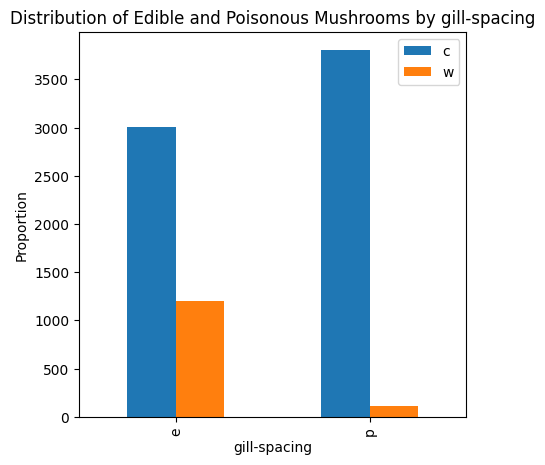

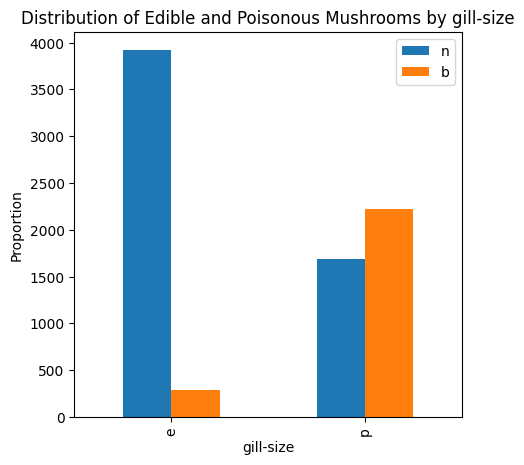

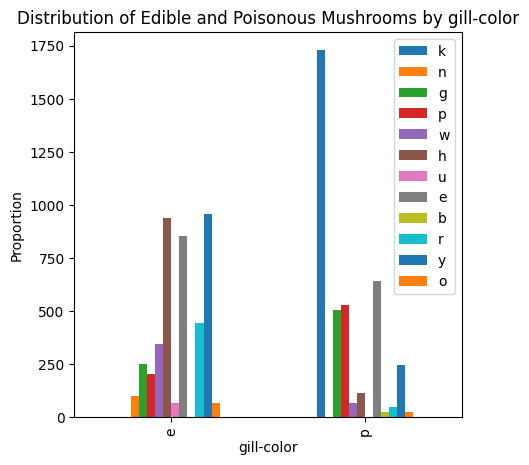

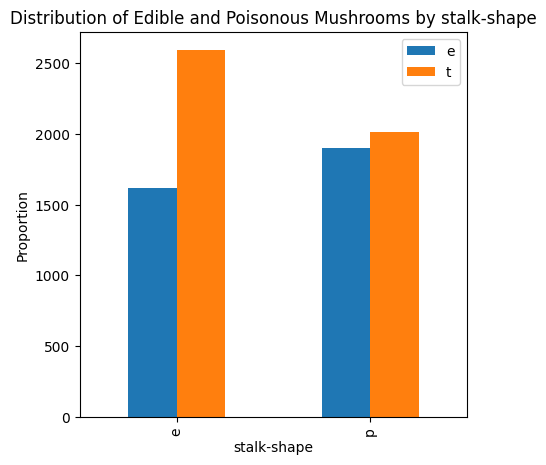

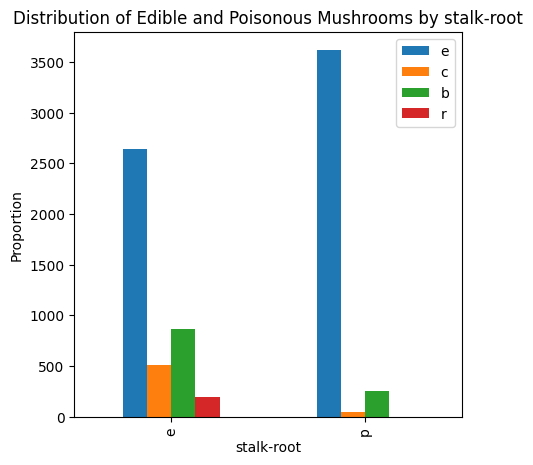

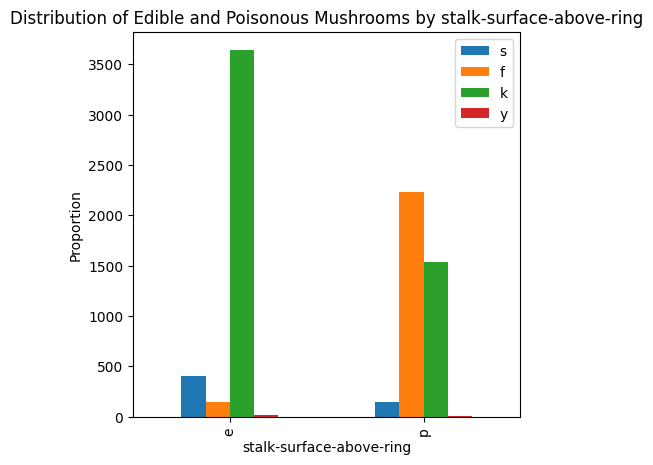

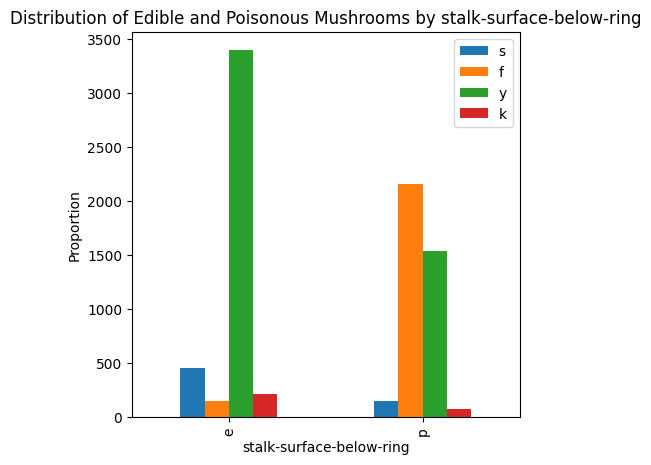

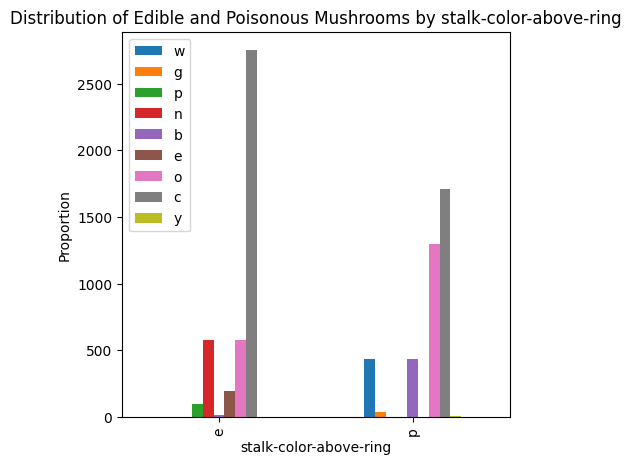

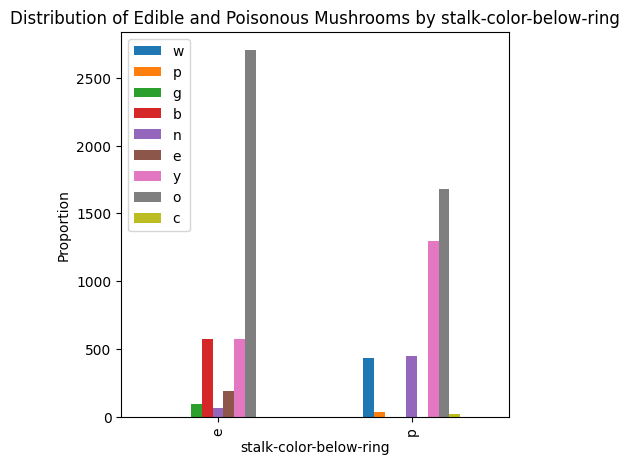

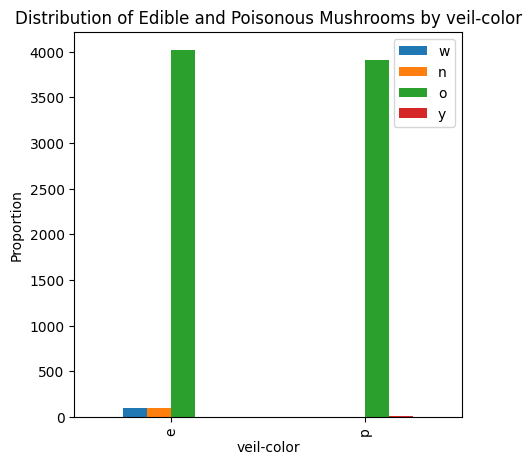

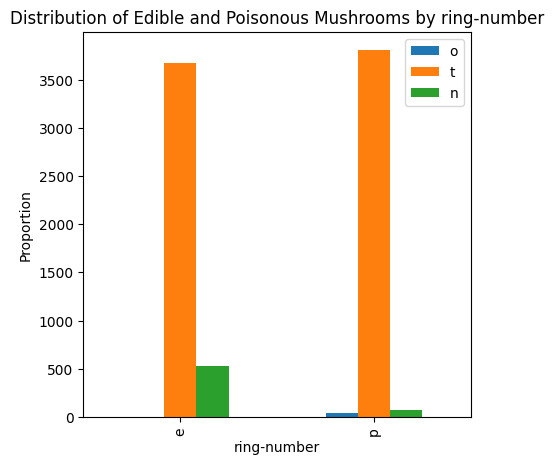

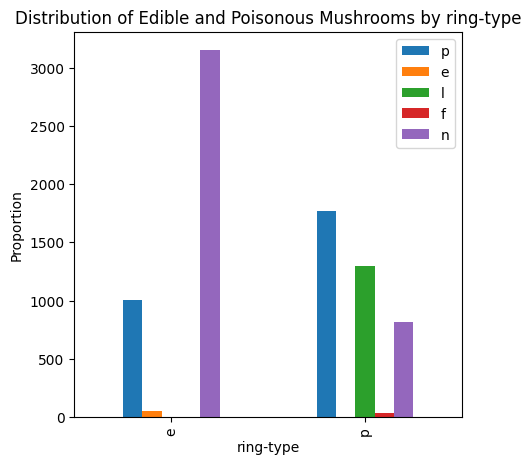

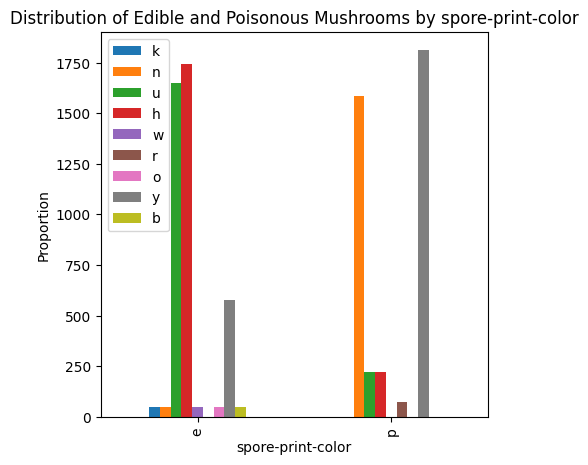

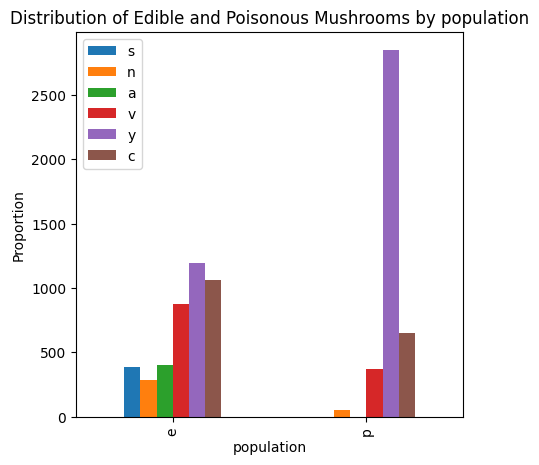

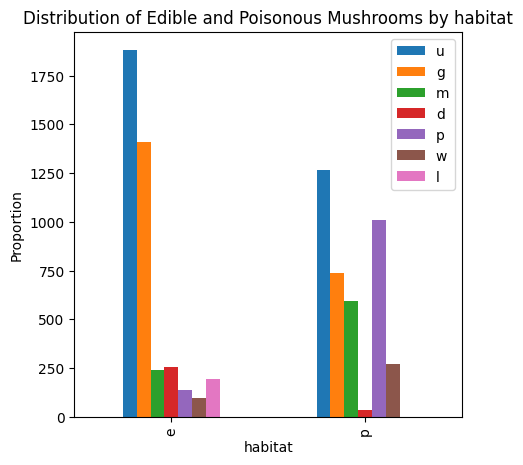

In [26]:
# Now I will see if there is any determining factors for any of the features in terms of edibility
grouped = mushrooms.groupby(['poisonous'])
plt.rcParams["figure.figsize"] = [5, 5]
# Iterate over each feature and plot the bar graph
for feature in mushrooms.columns:
    if feature != 'poisonous':  # Skip the target variable
        feature_counts = grouped[feature].value_counts().unstack()
        feature_counts.plot(kind='bar')
        plt.title(f"Distribution of Edible and Poisonous Mushrooms by {feature}")
        plt.xlabel(feature)
        plt.ylabel("Proportion")
        plt.legend(mushrooms[feature].unique())

####Findings
> Upon exploring the dataset, it was found that the overall percentage of edible mushrooms is 51.8%. Key features such as odor, spore-print-color, stalk-surface-below-ring, stalkcolor-above-ring, habitat, and cap-color exhibit notable distinctions between edible and poisonous mushrooms. By plotting the distribution of edible and poisonous mushrooms for each feature category, clear patterns emerged, highlighting the significance of these features in determining mushroom edibility.

> To provide a succinct overview of the distribution of edible and poisonous mushrooms across different feature categories, a table was constructed. This table showcases the count of edible and poisonous mushrooms for each feature category, facilitating easy comparison and identification of potential correlations between features and mushroom edibility.

In [27]:
odor_counts = grouped['odor'].value_counts()
spore_counts = grouped['spore-print-color'].value_counts()
stalk_surface_counts = grouped['stalk-surface-below-ring'].value_counts()
stalkcolor_counts = grouped['stalk-color-above-ring'].value_counts()
habitat_counts = grouped['habitat'].value_counts()
cap_color_counts = grouped['cap-color'].value_counts()

all_counts = pd.concat([odor_counts, spore_counts, stalk_surface_counts, stalkcolor_counts, habitat_counts, cap_color_counts], axis=1)

print("Table of Edible and Poisonous Mushrooms for Each Feature Category:")
all_counts.fillna(0)

Table of Edible and Poisonous Mushrooms for Each Feature Category:


odor  spore-print-color  stalk-surface-below-ring  \
poisonous                                                          
e         n  3408.0             1744.0                       0.0   
          a   400.0                0.0                       0.0   
          l   400.0                0.0                       0.0   
p         f  2160.0                0.0                     144.0   
          s   576.0                0.0                    1536.0   
          y   576.0                0.0                      76.0   
          p   256.0                0.0                       0.0   
          c   192.0                0.0                       0.0   
          n   120.0              224.0                       0.0   
          m    36.0                0.0                       0.0   
e         k     0.0             1648.0                     144.0   
          w     0.0              576.0                       0.0   
          b     0.0               48.0                       0.0   
          h     0.0               48.0                       0.0   
          o     0.0               48.0                       0.0   
          u     0.0               48.0                       0.0   
          y     0.0               48.0                     208.0   
p         w     0.0             1812.0                       0.0   
          h     0.0             1584.0                       0.0   
          k     0.0              224.0                    2160.0   
          r     0.0               72.0                       0.0   
e         s     0.0                0.0                    3400.0   
          f     0.0                0.0                     456.0   
          g     0.0                0.0                       0.0   
          p     0.0                0.0                       0.0   
          e     0.0                0.0                       0.0   
p         b     0.0                0.0                       0.0   
e         d     0.0                0.0                       0.0   
          m     0.0                0.0                       0.0   
p         d     0.0                0.0                       0.0   
          g     0.0                0.0                       0.0   
          l     0.0                0.0                       0.0   
          u     0.0                0.0                       0.0   
e         c     0.0                0.0                       0.0   
          r     0.0                0.0                       0.0   
p         e     0.0                0.0                       0.0   

             stalk-color-above-ring  habitat  cap-color  
poisonous                                                
e         n                    16.0      0.0     1264.0  
          a                     0.0      0.0        0.0  
          l                     0.0    240.0        0.0  
p         f                     0.0      0.0        0.0  
          s                     0.0      0.0        0.0  
          y                     8.0      0.0      672.0  
          p                  1296.0   1008.0       88.0  
          c                    36.0      0.0       12.0  
          n                   432.0      0.0     1020.0  
          m                     0.0     36.0        0.0  
e         k                     0.0      0.0        0.0  
          w                  2752.0    192.0      720.0  
          b                     0.0      0.0       48.0  
          h                     0.0      0.0        0.0  
          o                   192.0      0.0        0.0  
          u                     0.0     96.0       16.0  
          y                     0.0      0.0      400.0  
p         w                  1712.0      0.0      320.0  
          h                     0.0      0.0        0.0  
          k                     0.0      0.0        0.0  
          r                     0.0      0.0        0.0  
e         s                     0.0      0.0        0.0  
          f                     0.0   

## 2. Effect of Odor on Edibility:
- Are there specific odors that are more commonly associated with either edible or poisonous mushrooms?
- Investigating the correlation between the odor of mushrooms and their edibility is essential. Understanding whether certain odors are associated with either edible or poisonous mushrooms provides practical information for identification in the wild.


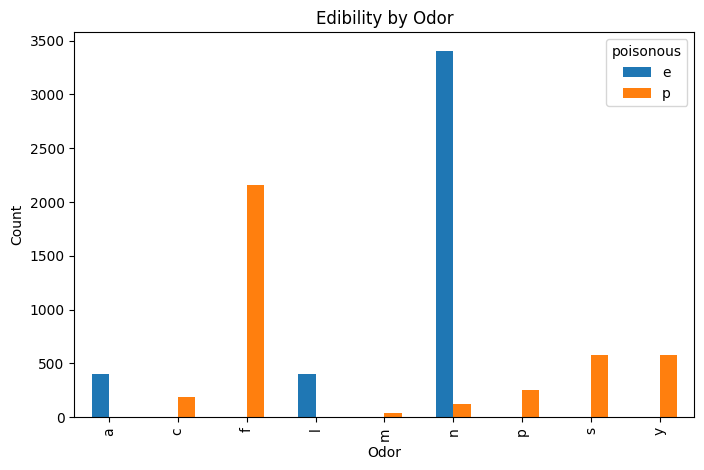

In [28]:
plt.rcParams["figure.figsize"] = [8, 5]
# Calculate the distribution of edible and poisonous mushrooms across odors
y['poisonous'].groupby(X['odor']).value_counts().unstack().plot(kind='bar')
# Plot the stacked bar chart
plt.title('Edibility by Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

### Findings
> Mushrooms with almond or anise scents are consistently edible, while those with foul, creosote, fishy, spicy, pungent, and musty odors are predominantly poisonous. This information is crucial for identifying mushrooms based on their smell. I would like to test the effect of odor with other features as well.

## 3. Relationship Between Habitat and Odor in Mushroom Toxicity:
- Is there a relationship between the habitat and odor of mushrooms in determining their toxicity?

- Understanding the potential associations between habitat and odor can provide valuable insights into whether knowing habitat and odor alone can help predict the toxicity of mushrooms found in various environments.

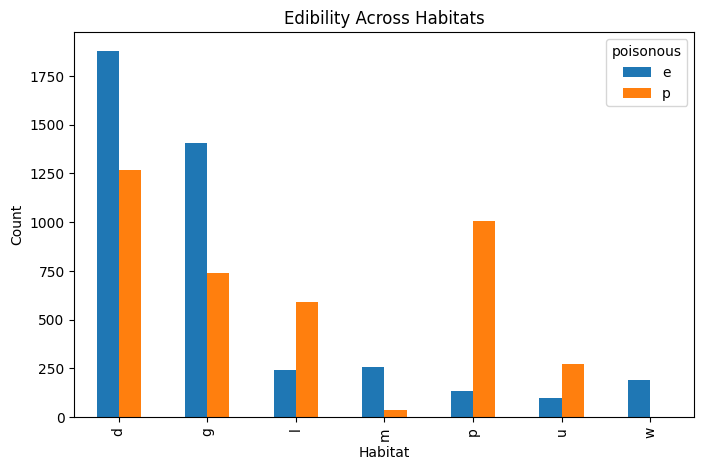

In [29]:
plt.rcParams["figure.figsize"] = [8, 5]
y['poisonous'].groupby(X['habitat']).value_counts().unstack().plot(kind='bar')
plt.title('Edibility Across Habitats')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.show()


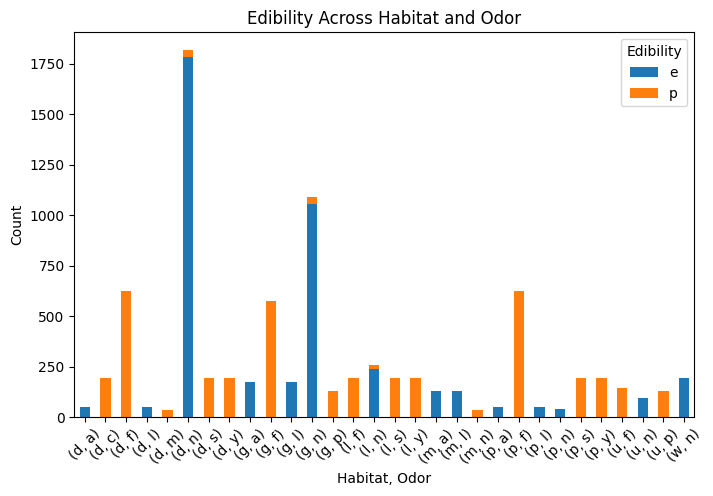

In [30]:
# Combine 'habitat' and 'odor' into a single DataFrame
data = pd.concat([mushrooms['habitat'], mushrooms['odor'], mushrooms['poisonous']], axis=1)

# Group by 'habitat' and 'odor', then count occurrences of edibility
edibility_by_habitat_odor = data.groupby(['habitat', 'odor', 'poisonous']).size().unstack(fill_value=0)

# Plot the stacked bar chart
edibility_by_habitat_odor.plot(kind='bar', stacked=True)
plt.title('Edibility Across Habitat and Odor')
plt.xlabel('Habitat, Odor')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Edibility')  # Add legend with edibility labels
plt.show()

In [31]:
print(edibility_by_habitat_odor)

poisonous        e    p
habitat odor           
d       a       48    0
        c        0  192
        f        0  624
        l       48    0
        m        0   36
        n     1784   32
        s        0  192
        y        0  192
g       a      176    0
        f        0  576
        l      176    0
        n     1056   36
        p        0  128
l       f        0  192
        n      240   16
        s        0  192
        y        0  192
m       a      128    0
        l      128    0
        n        0   36
p       a       48    0
        f        0  624
        l       48    0
        n       40    0
        s        0  192
        y        0  192
u       f        0  144
        n       96    0
        p        0  128
w       n      192    0


### Findings
>  __Habitat and Odor Associations__: The table shows how the presence of certain odors varies across different habitats. For example:
> - In habitat "d" (Woods), mushrooms with odor "n" (None) are predominantly edible, while mushrooms with odors "c" (Creosote), "s" (Spicy), and "y" (Fishy) are mostly poisonous.
> - Habitat "g" (Grasses) has mushrooms with odor "f" (Foul) predominantly poisonous, while odor "a" (Almond) is associated with mostly edible mushrooms.
> - Habitat "l" (Leaves) primarily contains mushrooms with odor "n" (None), among which some are edible and some are poisonous.

> __Absence of Certain Odors__: Some habitats have no mushrooms with certain odors. For instance:
> - Habitat "m" (Meadows) lacks mushrooms with odor "a" (Almond), "f" (Foul), and "y" (Fishy).
> - Habitat "u" (Urban) does not have mushrooms with odor "a" (Almond) or "f" (Foul).

> __Varied Distribution__: The distribution of edible and poisonous mushrooms varies across habitats and odors, indicating potential associations between these factors and mushroom toxicity.

> __Predictive Feature__s: Understanding the relationships between habitat, odor, and mushroom toxicity can be valuable for predictive modeling. Features derived from these associations may contribute to the accurate classification of mushrooms as edible or poisonous.

## 4. Exploring the Relationship Between Cap-Color and Odor in Mushroom Edibility

- Can we discern any trends or patterns regarding the cap-color and odor of mushrooms in relation to their edibility?
- This analysis aims to investigate the potential association between cap-color and odor concerning the likelihood of mushrooms being edible or poisonous. By examining the relationship between these two prominent features, we aim to uncover any patterns or correlations that may exist, shedding light on their combined impact on mushroom toxicity.

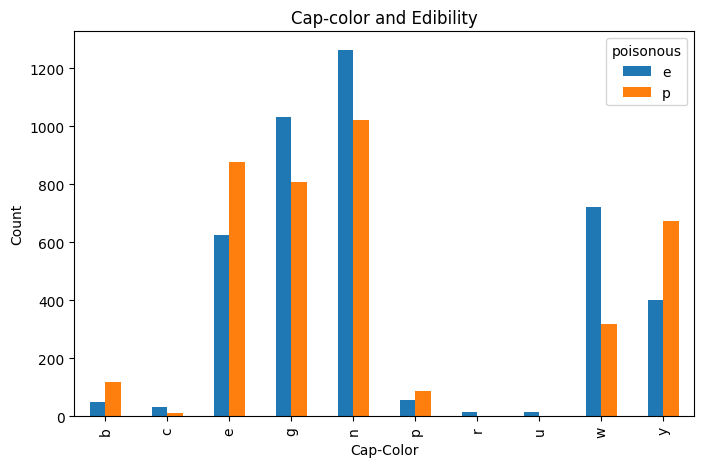

In [32]:
# Calculate the distribution of edible and poisonous mushrooms across cap-colors
mushrooms['poisonous'].groupby(mushrooms['cap-color']).value_counts().unstack().plot(kind='bar')

plt.rcParams["figure.figsize"] = [8,5]
# Plot the stacked bar chart
plt.title('Cap-color and Edibility')
plt.xlabel('Cap-Color')
plt.ylabel('Count')
plt.show()

When just looking at cap-color, it is not a good fit for determining edibility alone. Both edible and poisonous mushrooms come in at least eight out of the ten colors within the dataset. However, lets see how it helps to determining edibility when grouped with odor, habitat, and population.

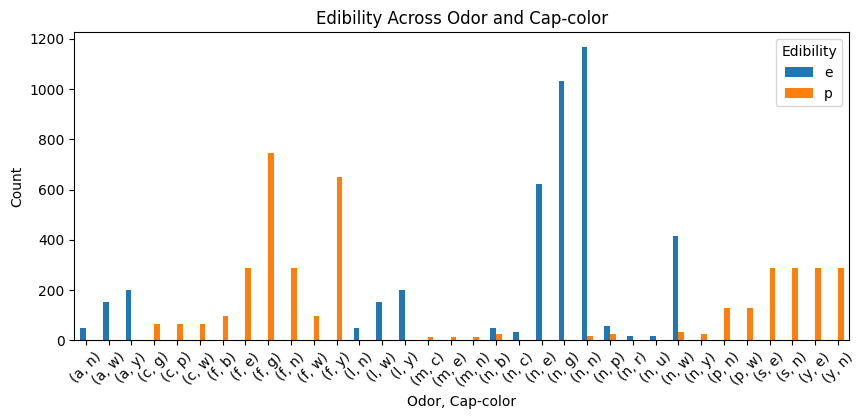

In [33]:
data = pd.concat([mushrooms['odor'], mushrooms['cap-color'], mushrooms['poisonous']], axis=1)

edibility_by_odor_capcolor = data.groupby(['odor', 'cap-color', 'poisonous']).size().unstack(fill_value=0)

plt.rcParams["figure.figsize"] = [10,4]
# Plot the stacked bar chart
edibility_by_odor_capcolor.plot(kind='bar')
plt.title('Edibility Across Odor and Cap-color')
plt.xlabel('Odor, Cap-color')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Edibility')  # Add legend with edibility labels
plt.show()

In [34]:
print(edibility_by_odor_capcolor)

poisonous          e    p
odor cap-color           
a    n            48    0
     w           152    0
     y           200    0
c    g             0   64
     p             0   64
     w             0   64
f    b             0   96
     e             0  288
     g             0  744
     n             0  288
     w             0   96
     y             0  648
l    n            48    0
     w           152    0
     y           200    0
m    c             0   12
     e             0   12
     n             0   12
n    b            48   24
     c            32    0
     e           624    0
     g          1032    0
     n          1168   16
     p            56   24
     r            16    0
     u            16    0
     w           416   32
     y             0   24
p    n             0  128
     w             0  128
s    e             0  288
     n             0  288
y    e             0  288
     n             0  288


###Findings
> __Odor and Cap-Color Associations__: The data illustrates how the presence of certain odors varies across different cap-colors. For instance:
> - For cap-color "n" (Brown), mushrooms with odor "a" (Almond), "l" (Anise), and "y" (Fishy) are exclusively edible, with no instances of poisonous mushrooms.
> - Cap-color "g" (Gray) combined with odor "c" (Creosote) or "f" (Foul) indicates a high likelihood of the mushrooms being poisonous.
> - Cap-color "w" (White) with odor "n" (None) or "l" (Anise) are consistently associated with edible mushrooms.

> __Absence of Certain Odors__: Certain cap-colors lack mushrooms with specific odors. For example:
> - Cap-color "b" (Buff) does not have mushrooms with odor "f" (Foul), "m" (Musty), or "y" (Fishy).
> - Cap-color "p" (Pink) lacks mushrooms with odor "a" (Almond), "f" (Foul), and "y" (Fishy).

> __Varied Distribution__: The distribution of edible and poisonous mushrooms varies across cap-colors and odors, suggesting potential associations between these factors and mushroom toxicity.

> __Predictive Features__: Understanding the relationships between odor and cap-color can provide valuable insights for predicting mushroom edibility. Features derived from these associations may enhance the accuracy of classification models by identifying distinguishing patterns between edible and poisonous mushrooms.

# Feature Engineering

### _Feature 1_: Odor-Habitat Interaction
> __Description__: We will engineer another new feature representing the interaction between odor and habitat. This feature will capture the joint influence of odor and habitat on mushroom toxicity.

> __Plan__: By creating a new categorical variable that combines odor and habitat, we aim to identify patterns where specific combinations of odor and cap color are indicative of mushroom toxicity. This interaction term may reveal synergistic or antagonistic relationships between odor and cap color in predicting edibility.

> __Rationale__: Habitat and odor are important factors in determining mushroom edibility, and their interaction may provide additional predictive insights. By examining how different odors manifest across various habitats, we can identify habitat-specific odor profiles that are indicative of mushroom toxicity.

> __Unit Testing__: We will conduct unit testing by analyzing the distribution of edible and poisonous mushrooms across different combinations of odor and habitat. Furthermore, we will evaluate the performance of our model after incorporating this feature, focusing on key performance metrics to assess its effectiveness in improving classification accuracy.

In [231]:
mushrooms_f1 = mushrooms.copy()
grouped_f1 = mushrooms_f1.groupby(['poisonous'])
mushrooms_f1['odor_habitat'] = mushrooms['odor'] + '_' + mushrooms['habitat']

#comb_enco_f1 = pd.get_dummies(mushrooms_f1['odor_habitat'])

#mushrooms_f1 = pd.concat([mushrooms_f1, mushrooms], axis=1)

grouped_f1['odor_habitat'].value_counts()


poisonous  odor_habitat
e          n_d             1784
           n_g             1056
           n_l              240
           n_w              192
           a_g              176
           l_g              176
           a_m              128
           l_m              128
           n_u               96
           a_d               48
           a_p               48
           l_d               48
           l_p               48
           n_p               40
p          f_d              624
           f_p              624
           f_g              576
           c_d              192
           f_l              192
           s_d              192
           s_l              192
           s_p              192
           y_d              192
           y_l              192
           y_p              192
           f_u              144
           p_g              128
           p_u              128
           m_d               36
           n_g               36
           n_m  

In [232]:
mushrooms_f1 = mushrooms_f1.drop(columns = ['odor', 'habitat'])
mushrooms_f1.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'poisonous', 'odor_habitat'],
      dtype='object')

In [234]:
#mushrooms = mushrooms_f1.copy()

### _Feature 2_: Odor-Cap Color Interaction:
> __Description__: We will engineer a new feature representing the interaction between odor and cap color. This feature will capture the combined influence of both odor and cap color on mushroom edibility.

>__Plan__:  Similar to the odor-habitat interaction, we will create a new categorical variable that combines odor and cap color information. This feature will allow us to explore how specific combinations of odor and cap color are associated with edible or poisonous mushrooms.

>__Rationale__: Odor and cap color are both significant features in determining mushroom edibility. By incorporating their interaction, we can capture more nuanced relationships that may enhance the predictive power of our model.

> __Unit Testing__: After introducing this feature, we will conduct unit testing by examining the distribution of edible and poisonous mushrooms across different combinations of odor and cap color. Additionally, we will evaluate the impact of this feature on model performance metrics such as accuracy, precision, recall, and F1-score.

In [301]:
mushrooms_f2 = mushrooms.copy()
grouped_f2 = mushrooms_f2.groupby(['poisonous'])

mushrooms_f2['odor_cap-color'] = mushrooms['odor'] + '_' + mushrooms['cap-color']

#comb_enco_f2 = pd.get_dummies(mushrooms_f2['odor_cap-color'])

#mushrooms_f2 = pd.concat([mushrooms_f2, comb_enco_f2], axis=1)

grouped_f2['odor_cap-color'].value_counts()

poisonous  odor_cap-color
e          n_n               1168
           n_g               1032
           n_e                624
           n_w                416
           a_y                200
           l_y                200
           a_w                152
           l_w                152
           n_p                 56
           a_n                 48
           l_n                 48
           n_b                 48
           n_c                 32
           n_r                 16
           n_u                 16
p          f_g                744
           f_y                648
           f_e                288
           f_n                288
           s_e                288
           s_n                288
           y_e                288
           y_n                288
           p_n                128
           p_w                128
           f_b                 96
           f_w                 96
           c_g                 64
           c_p        

In [302]:
mushrooms_f2 = mushrooms_f2.drop(columns = ['odor', 'cap-color'])
mushrooms_f2.columns

Index(['cap-shape', 'cap-surface', 'bruises', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat', 'poisonous', 'odor_cap-color'],
      dtype='object')

In [303]:
#mushrooms = mushrooms_f2.copy()

## _Feature Set_: Odor-Habitat and Odor-Cap Color

In [367]:
mushrooms_fb = mushrooms.copy()
grouped_fb = mushrooms_fb.groupby(['poisonous'])

mushrooms_fb['odor_habitat'] = mushrooms['odor'] + '_' + mushrooms['habitat']
mushrooms_fb['odor_cap-color'] = mushrooms['odor'] + '_' + mushrooms['cap-color']

#comb_enco_fb1 = pd.get_dummies(mushrooms_fb['odor_habitat'])
#comb_enco_fb2 = pd.get_dummies(mushrooms_f2['odor_cap-color'])

#mushrooms_fb = pd.concat([mushrooms_fb, comb_enco_fb1, comb_enco_fb2], axis=1)

grouped_fb['odor_cap-color', 'odor_habitat'].value_counts()

<ipython-input-367-9d677510d4a0>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_fb['odor_cap-color', 'odor_habitat'].value_counts()


poisonous  odor_cap-color  odor_habitat
e          n_n             n_d             584
           n_g             n_d             576
           n_e             n_d             576
           n_g             n_g             400
           n_w             n_g             400
                                          ... 
p          n_w             n_g              12
           n_p             n_m              12
           m_c             m_d              12
           n_y             n_l               8
           n_w             n_l               8
Length: 88, dtype: int64

In [368]:
mushrooms_fb = mushrooms_fb.drop(columns = ['odor', 'cap-color', 'habitat'])
mushrooms_fb.columns

Index(['cap-shape', 'cap-surface', 'bruises', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'poisonous', 'odor_habitat', 'odor_cap-color'],
      dtype='object')

In [369]:
mushrooms = mushrooms_fb.copy()

# Test Train Split


> The dataset comprises 8,124 entries after the initial data cleanup process. To maintain data integrity and ensure robust model evaluation, we have split the dataset into a training set and a testing set using a 75/25 split ratio. Consequently, the training set consists of 6,093 entries, which accounts for 75% of the data, while the testing set contains the remaining 2,031 entries.

In [370]:
#Split X and y into features and target(poisonous)
class_column = 'poisonous'
display(mushrooms.describe())
X_train, X_test, y_train, y_test = train_test_split(mushrooms.drop(columns=class_column), mushrooms[class_column],
                                                    test_size=0.25, random_state=1234, stratify=mushrooms[class_column])
mushrooms

,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,poisonous,odor_habitat,odor_cap-color
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,2,2,2,2,12,2,4,4,...,9,9,4,3,5,9,6,2,30,34
top,x,y,f,f,c,b,b,t,b,s,...,w,w,w,o,p,w,v,e,n_d,n_n
freq,3656,3244,4748,7914,6812,5612,1728,4608,6256,5176,...,4464,4384,7924,7488,3968,2388,4040,4208,1816,1184


,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,poisonous,odor_habitat,odor_cap-color
0,x,s,t,f,c,n,k,e,e,s,...,w,w,w,o,p,k,s,p,p_u,p_n
1,x,s,t,f,c,b,k,e,c,s,...,w,w,w,o,p,n,n,e,a_g,a_y
2,b,s,t,f,c,b,n,e,c,s,...,w,w,w,o,p,n,n,e,l_m,l_w
3,x,y,t,f,c,n,n,e,e,s,...,w,w,w,o,p,k,s,p,p_u,p_w
4,x,s,f,f,w,b,k,t,e,s,...,w,w,w,o,e,n,a,e,n_g,n_g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,f,a,c,b,y,e,b,s,...,o,o,o,o,p,b,c,e,n_l,n_n
8120,x,s,f,a,c,b,y,e,b,s,...,o,o,n,o,p,b,v,e,n_l,n_n
8121,f,s,f,a,c,b,n,e,b,s,...,o,o,o,o,p,b,c,e,n_l,n_n
8122,k,y,f,f,c,n,b,t,b,s,...,w,w,w,o,e,w,v,p,y_l,y_n


In [371]:
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head())

On X train: 
X train dimensions:  (6093, 20)


,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,odor_habitat,odor_cap-color
3293,f,f,t,f,c,b,n,t,b,s,s,g,g,w,o,p,n,v,n_d,n_e
4487,x,y,f,f,c,b,p,e,b,k,k,p,p,w,o,l,h,v,f_d,f_g
1576,x,s,f,f,w,b,k,t,e,f,s,w,w,w,o,e,k,s,n_g,n_w
5512,x,s,t,f,c,b,w,t,b,s,s,w,w,w,o,p,h,s,f_g,f_g
2467,x,y,t,f,c,b,p,t,b,s,s,p,w,w,o,p,k,v,n_d,n_e



On X test: 
X test dimensions:  (2031, 20)


,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,odor_habitat,odor_cap-color
2572,x,y,t,f,c,b,w,t,b,s,s,w,g,w,o,p,n,y,n_d,n_n
2746,x,f,t,f,c,b,n,t,b,s,s,p,g,w,o,p,k,v,n_d,n_g
3365,x,f,f,f,w,n,g,e,b,s,s,w,w,w,o,p,n,s,c_d,c_p
8013,b,s,f,a,c,b,n,e,b,s,s,o,o,o,o,p,b,v,n_l,n_n
4483,f,y,f,f,c,b,h,e,b,k,k,b,p,w,o,l,h,v,f_g,f_g


In [372]:
# y Train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
y_train = y_train.to_frame(name='poisonous')
display(y_train.head())

# y test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
y_test = y_test.to_frame(name='poisonous')
display(y_test.head())

On y train: 
y train dimensions:  (6093,)


,poisonous
3293,e
4487,p
1576,e
5512,p
2467,e



On y test: 
y test dimensions:  (2031,)


,poisonous
2572,e
2746,e
3365,p
8013,e
4483,p


# Establish Training Pipeline

> - __One Hot Encoding__: To prepare our dataset for analysis, we will apply one-hot encoding to all of our features.By creating binary variables for each category within our features, one-hot encoding ensures that our model can interpret the data accurately without imposing any ordinal assumptions. This step enables us to work with our dataset seamlessly, enhancing the compatibility of our features with various analytical techniques and contributing to more robust model performance.
> __Imputation__: : During the data cleanup process, missing values in the 'stalk-root' feature were handled using imputation. The missing values, represented as '?', were replaced with the most frequent category (mode) in the 'stalk-root' feature. Imputation is a common technique used to address missing data, ensuring that the dataset remains complete and suitable for analysis. In this case, imputing missing values in 'stalk-root' allows us to retain valuable information without significantly impacting the predictability of mushroom toxicity.

In [373]:
mushrooms.columns


Index(['cap-shape', 'cap-surface', 'bruises', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'poisonous', 'odor_habitat', 'odor_cap-color'],
      dtype='object')

In [374]:
cat_features = ['cap-shape', 'cap-surface', 'bruises', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'odor_habitat', 'odor_cap-color']

#createing onehotencoder object to easily call if needed
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

#create pipeline fro categorical variables
cat_pipeline = Pipeline(steps=[('onehot_cat', ohe)])


preproc = ColumnTransformer([('cat', cat_pipeline, cat_features)], remainder='passthrough')


# Machine Learning Pipelines

## _Model 1_: Linear Regression


### Model Pipeline

In [375]:
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

# visualization of the pipeline
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'bruises', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population', 'odor_habitat',
                                                   'odor_cap-color'])])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

### Cross-Validation and Hyperparameter Tuning

In [376]:
lr_tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }


lr_grid_search = GridSearchCV(pipe, param_grid = lr_tuning_grid, cv = 5, return_train_score=True)

In [377]:
lr_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['cap-shape',
                                                                          'cap-surface',
                                                                          'bruises',
                                                                          'gill-attachment',
                                                                          'gill-spacing',
                                                                          'gill-size',
                                                                          'gill-color',
                                                                          'stalk-shape',
                                                                          'stalk-root',
                                                                          'stalk-surface-abo...
                                                                          'stalk-color-below-ring',
                                                                          'veil-color',
                                                                          'ring-number',
                                                                          'ring-type',
                                                                          'spore-print-color',
                                                                          'population',
                                                                          'odor_habitat',
                                                                          'odor_cap-color'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [378]:
print(lr_grid_search.best_score_)
lr_grid_search.best_params_

1.0


{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}

In [379]:
pd.DataFrame(lr_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__C,param_mdl__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.166038,0.021525,0.019344,0.000390,0.1,0.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.0}",0.997539,0.995078,0.998359,...,0.996389,0.001334,12,0.997948,0.996717,0.997538,0.995282,0.997333,0.996964,0.000930
1,0.186514,0.007200,0.019360,0.000453,0.1,0.25,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.25}",0.995898,0.992617,0.998359,...,0.994912,0.002037,15,0.997538,0.995486,0.998153,0.995692,0.996308,0.996636,0.001043
2,0.201457,0.005120,0.019568,0.000223,0.1,0.5,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.5}",0.995898,0.993437,0.995898,...,0.994912,0.001592,14,0.995691,0.995486,0.996102,0.995282,0.995487,0.995610,0.000278
3,0.241658,0.005751,0.022990,0.003426,0.1,0.75,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.75}",0.998359,0.993437,0.996719,...,0.995240,0.002345,13,0.996922,0.995076,0.997333,0.994462,0.994462,0.995651,0.001233
4,0.578362,0.096836,0.029042,0.007815,0.1,1.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 1.0}",0.998359,0.997539,0.997539,...,0.996881,0.002166,11,0.997333,0.998359,0.997538,0.995282,0.998154,0.997333,0.001093
5,0.328283,0.018993,0.026284,0.008913,316.227766,0.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",1.000000,1.000000,1.000000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.402248,0.015715,0.021096,0.002614,316.227766,0.25,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",1.000000,1.000000,1.000000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.400458,0.011358,0.020114,0.000915,316.227766,0.5,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",1.000000,1.000000,1.000000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.398293,0.014399,0.020097,0.001250,316.227766,0.75,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",1.000000,1.000000,1.000000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.571835,0.099898,0.029658,0.006888,316.227766,1.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",1.000000,1.000000,1.000000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


### Final Fit

In [380]:
lr_grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'bruises', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population', 'odor_habitat',
                                                   'odor_cap-color'])])),
                ('mdl',
                 LogisticRegression(C=316.22776601683796, l1_ratio=0.0,
                                    penalty='elasticnet', solver='saga',
                                    tol=0.01))])

### Variable Importance

In [381]:
lr_grid_search.classes_

array(['e', 'p'], dtype=object)

,vip,coef_mag,coef_sign
feature_names,,,
odor_habitat_c_d,5.302903,5.302903,1.0
spore-print-color_r,5.124635,5.124635,1.0
odor_habitat_n_d,-4.531755,4.531755,-1.0
ring-type_f,-4.051288,4.051288,-1.0
gill-size_b,-3.714162,3.714162,-1.0
...,...,...,...
cap-surface_s,-0.071730,0.071730,-1.0
odor_cap-color_n_w,-0.030562,0.030562,-1.0
stalk-root_e,0.023899,0.023899,1.0


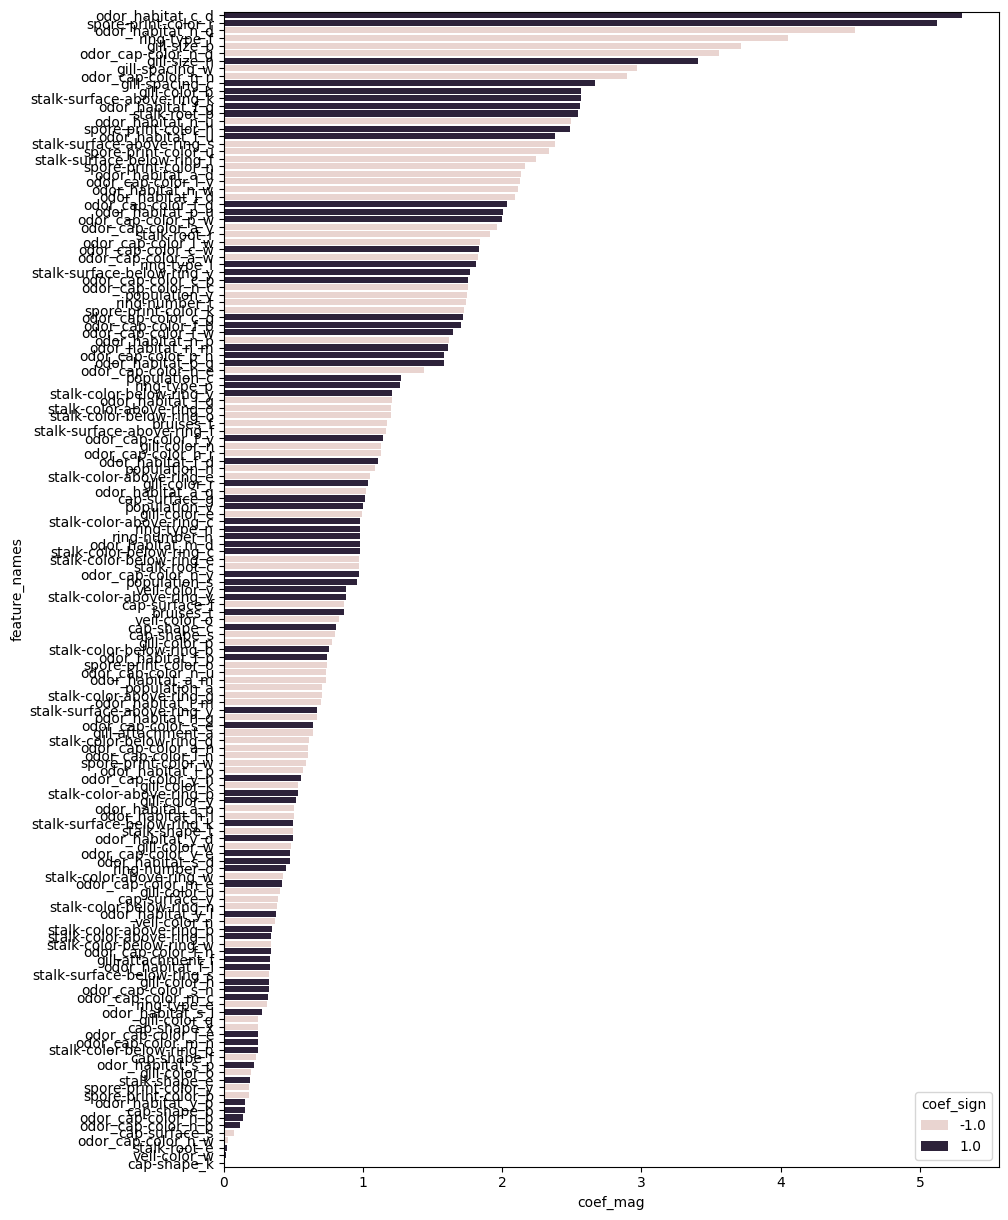

In [382]:
lr_vip = lr_grid_search.best_estimator_['mdl'].coef_[0]

# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = lr_grid_search.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': lr_vip})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))


plt.rcParams["figure.figsize"] = [10,15]
# sort the coef_info dataframe and plot with a barplot!
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
display(coef_info)

### Performance metrics

In [383]:
print(classification_report(y_test, lr_grid_search.best_estimator_.predict(X_test))) # prediction on test set

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



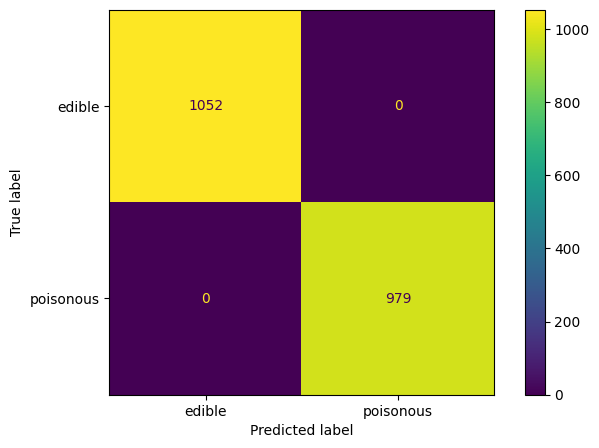

In [384]:
print(classification_report(y_test, lr_grid_search.best_estimator_.predict(X_test)))
lr_cm = confusion_matrix(y_test, lr_grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm,
                               display_labels=['edible', 'poisonous'])
plt.rcParams["figure.figsize"] = [8, 5]
disp.plot()

plt.show()

### ROC Curve

In [385]:
y_pred = lr_grid_search.best_estimator_.predict_proba(X_test)
y_pred = y_pred[:, 1]
y_true_ohe = ohe.fit_transform(y_test)
y_test_binary_lr = np.argmax(y_true_ohe.values, axis=1)

y_test_binary_lr

array([0, 0, 1, ..., 1, 1, 0])

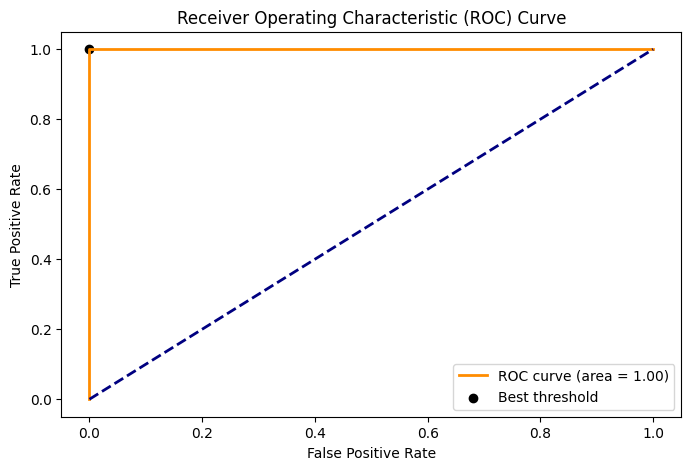

Area under the ROC curve (AUC): 1.0


In [386]:
fpr, tpr, thresholds = roc_curve(y_test_binary_lr, y_pred)
net_gain = tpr - fpr
ix = np.argmax(net_gain)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = [8, 5]

plt.show()

roc_auc = auc(fpr, tpr)
print("Area under the ROC curve (AUC):", roc_auc)

### Precision-Recall Curve

Best Threshold=0.796266 
f1 score=1.000


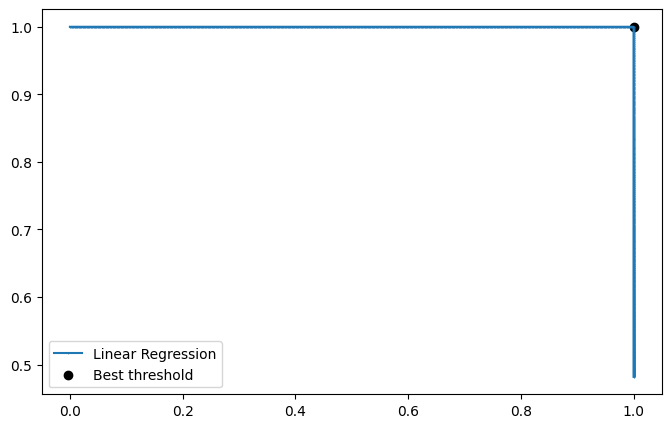

In [387]:
precision, recall, thresholds = precision_recall_curve(y_test_binary_lr, y_pred)
f1 = 2 * ((precision * recall) / (precision + recall))
ix = np.argmax(f1)

print('Best Threshold=%f \nf1 score=%.3f' % (thresholds[ix], f1[ix]))

plt.plot(recall, precision, marker='.', label='Linear Regression', markersize= 0.5)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best threshold')

plt.legend()
plt.show()

## _Model 2_: Random Forest Classifier



### Model Pipeline

In [388]:
#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', RandomForestClassifier())])

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'bruises', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population', 'odor_habitat',
                                                   'odor_cap-color'])])),
                ('mdl', RandomForestClassifier())])

### Cross-Validation and Hyperparameter Tuning

In [389]:
rf_tuning_grid = {'mdl__n_estimators' : [100, 200 ,500],
               'mdl__max_depth': [10, 15, 20] }
rf_grid_search = GridSearchCV(pipe, param_grid = rf_tuning_grid, cv = 5, return_train_score=True)
rf_tuning_grid

{'mdl__n_estimators': [100, 200, 500], 'mdl__max_depth': [10, 15, 20]}

In [390]:
rf_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['cap-shape',
                                                                          'cap-surface',
                                                                          'bruises',
                                                                          'gill-attachment',
                                                                          'gill-spacing',
                                                                          'gill-size',
                                                                          'gill-color',
                                                                          'stalk-shape',
                                                                          'stalk-root',
                                                                          'stalk-surface-above-ring',
                                                                          'stalk-surface-below-ring',
                                                                          'stalk-color-above-ring',
                                                                          'stalk-color-below-ring',
                                                                          'veil-color',
                                                                          'ring-number',
                                                                          'ring-type',
                                                                          'spore-print-color',
                                                                          'population',
                                                                          'odor_habitat',
                                                                          'odor_cap-color'])])),
                                       ('mdl', RandomForestClassifier())]),
             param_grid={'mdl__max_depth': [10, 15, 20],
                         'mdl__n_estimators': [100, 200, 500]},
             return_train_score=True)

In [391]:
print(rf_grid_search.best_score_)
rf_grid_search.best_params_

1.0


{'mdl__max_depth': 10, 'mdl__n_estimators': 100}

In [392]:
pd.DataFrame(rf_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__max_depth,param_mdl__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.377727,0.013979,0.032363,0.000602,10,100,"{'mdl__max_depth': 10, 'mdl__n_estimators': 100}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.844320,0.155068,0.060652,0.015701,10,200,"{'mdl__max_depth': 10, 'mdl__n_estimators': 200}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.709039,0.102044,0.103337,0.014230,10,500,"{'mdl__max_depth': 10, 'mdl__n_estimators': 500}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.474983,0.108147,0.036308,0.005426,15,100,"{'mdl__max_depth': 15, 'mdl__n_estimators': 100}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.712124,0.010893,0.051361,0.004328,15,200,"{'mdl__max_depth': 15, 'mdl__n_estimators': 200}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.861026,0.262495,0.107196,0.020064,15,500,"{'mdl__max_depth': 15, 'mdl__n_estimators': 500}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,0.376273,0.009833,0.032597,0.000945,20,100,"{'mdl__max_depth': 20, 'mdl__n_estimators': 100}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,0.850624,0.150997,0.058936,0.012028,20,200,"{'mdl__max_depth': 20, 'mdl__n_estimators': 200}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,1.806342,0.189809,0.105552,0.014334,20,500,"{'mdl__max_depth': 20, 'mdl__n_estimators': 500}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


### Final Fit

In [393]:
rf_grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'bruises', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population', 'odor_habitat',
                                                   'odor_cap-color'])])),
                ('mdl', RandomForestClassifier(max_depth=10))])

### Variable Importance

In [394]:
rf_grid_search.classes_

array(['e', 'p'], dtype=object)

,vip,coef_mag,coef_sign
feature_names,,,
gill-size_n,0.081269,0.081269,1.0
stalk-surface-above-ring_k,0.072497,0.072497,1.0
gill-size_b,0.069650,0.069650,1.0
spore-print-color_h,0.049647,0.049647,1.0
stalk-surface-below-ring_k,0.048408,0.048408,1.0
...,...,...,...
odor_habitat_a_p,0.000000,0.000000,0.0
odor_habitat_y_p,0.000000,0.000000,0.0
odor_cap-color_a_n,0.000000,0.000000,0.0


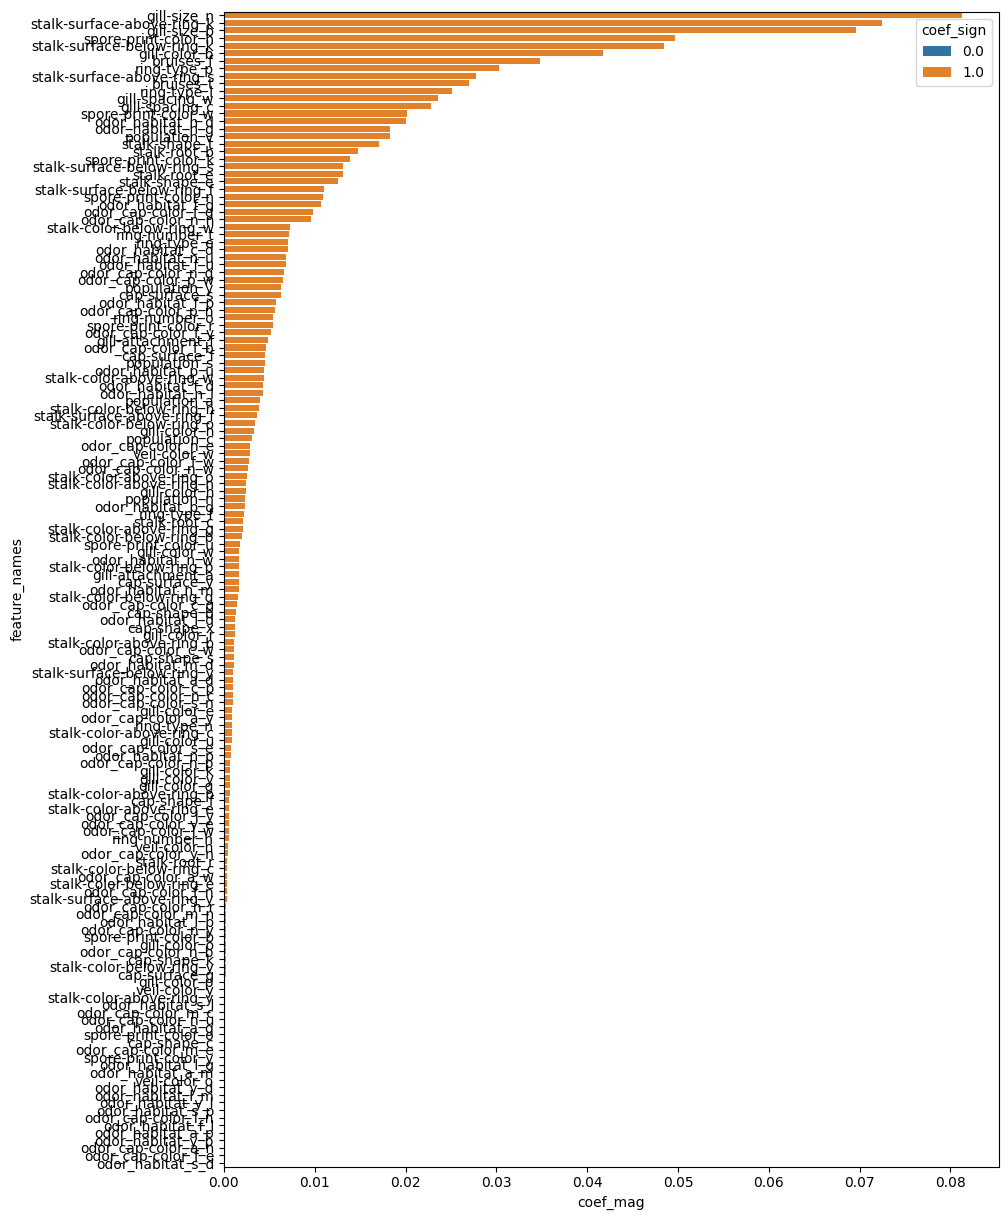

In [395]:
rf_vip = rf_grid_search.best_estimator_['mdl'].feature_importances_

# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = rf_grid_search.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': rf_vip})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))


plt.rcParams["figure.figsize"] = [10,15]
# sort the coef_info dataframe and plot with a barplot!
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
display(coef_info)

### Performance Metrics



In [396]:
print(classification_report(y_test, rf_grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



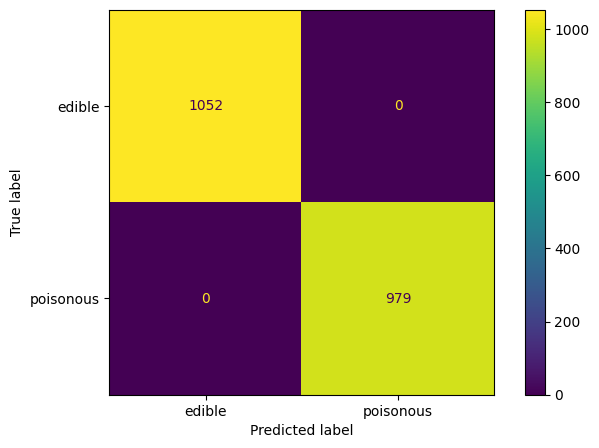

In [397]:
print(classification_report(y_test, rf_grid_search.best_estimator_.predict(X_test)))
rf_cm = confusion_matrix(y_test, rf_grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                               display_labels=['edible', 'poisonous'])
plt.rcParams["figure.figsize"] = [8, 5]
disp.plot()

plt.show()

### ROC Curve

In [398]:
y_pred = rf_grid_search.best_estimator_.predict_proba(X_test)
y_pred = y_pred[:,1]
y_true_ohe = ohe.fit_transform(y_test)
y_test_binary_rf = np.argmax(y_true_ohe.values, axis=1)

y_test_binary_rf

array([0, 0, 1, ..., 1, 1, 0])

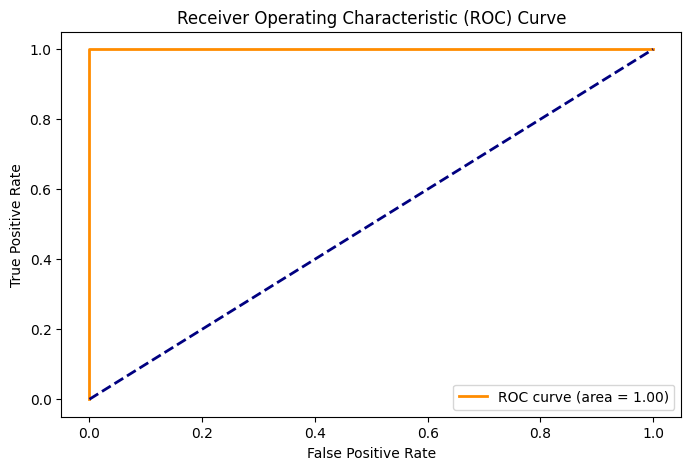

Area under the ROC curve (AUC): 0.9999999999999999


In [399]:
fpr, tpr, thresholds = roc_curve(y_test_binary_rf, y_pred)

# 3. Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = [8, 5]

plt.show()

# 4. Calculate Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve (AUC):", roc_auc)

### Precision-Recall Curve

Best Threshold=0.697567 
f1 score=1.000


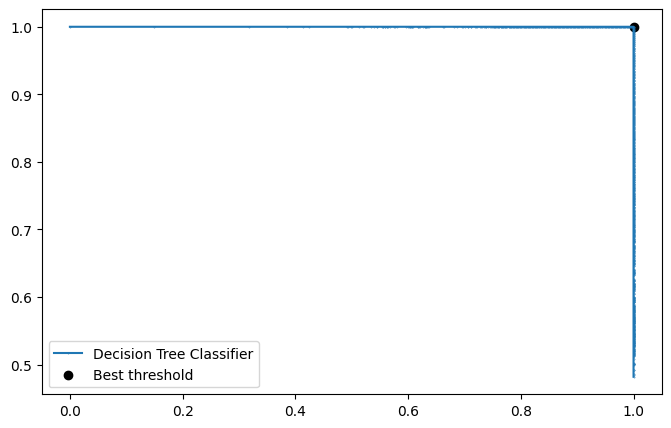

In [400]:
precision, recall, thresholds = precision_recall_curve(y_test_binary_rf, y_pred)
f1 = 2 * ((precision * recall) / (precision + recall))
ix = np.argmax(f1)

print('Best Threshold=%f \nf1 score=%.3f' % (thresholds[ix], f1[ix]))

plt.plot(recall, precision, marker='.', label='Decision Tree Classifier', markersize= 0.5)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best threshold')

plt.legend()
plt.show()

## _Model 3_: Categorical Naive Bayes

### Model Pipeline

In [401]:
# Define the pipeline with preprocessing and OneHotEncoder and model
pipe = Pipeline(steps=[
    ('preprocessor', preproc),  # Preprocessing steps
    ('mdl', CategoricalNB())
])


with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'bruises', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population', 'odor_habitat',
                                                   'odor_cap-color'])])),
                ('mdl', CategoricalNB())])

### Cross-Validation and Hyperparameter Tuning

In [402]:
cnb_tuning_grid = {'mdl__alpha' : [0.5, 1.0, 1.5, 2.0, 5],
               'mdl__force_alpha' : [True, False],
               'mdl__fit_prior'   : [True, False],
               'mdl__class_prior' : [None, [0.5, 0.5]],
               'mdl__min_categories'  : [None, 1, 2, 3, 4, 5] }
cnb_grid_search = GridSearchCV(pipe, param_grid = cnb_tuning_grid, cv = 5, return_train_score=True)
cnb_tuning_grid

{'mdl__alpha': [0.5, 1.0, 1.5, 2.0, 5],
 'mdl__force_alpha': [True, False],
 'mdl__fit_prior': [True, False],
 'mdl__class_prior': [None, [0.5, 0.5]],
 'mdl__min_categories': [None, 1, 2, 3, 4, 5]}

In [403]:
cnb_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['cap-shape',
                                                                          'cap-surface',
                                                                          'bruises',
                                                                          'gill-attachment',
                                                                          'gill-spacing',
                                                                          'gill-size',
                                                                          'gill-color',
                                                                          'stalk-shape',
                                                                          'stalk-root',
                                                                          'stalk-surfac...
                                                                          'stalk-color-below-ring',
                                                                          'veil-color',
                                                                          'ring-number',
                                                                          'ring-type',
                                                                          'spore-print-color',
                                                                          'population',
                                                                          'odor_habitat',
                                                                          'odor_cap-color'])])),
                                       ('mdl', CategoricalNB())]),
             param_grid={'mdl__alpha': [0.5, 1.0, 1.5, 2.0, 5],
                         'mdl__class_prior': [None, [0.5, 0.5]],
                         'mdl__fit_prior': [True, False],
                         'mdl__force_alpha': [True, False],
                         'mdl__min_categories': [None, 1, 2, 3, 4, 5]},
             return_train_score=True)

### Final Fit

In [404]:
cnb_grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'bruises', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population', 'odor_habitat',
                                                   'odor_cap-color'])])),
                ('mdl',
                 CategoricalNB(alpha=0.5, fit_prior=False, force_alpha=True))])

### Variable Importance

In [405]:
cnb_vip = permutation_importance(cnb_grid_search.best_estimator_, X_test, y_test)
cnb_vip.importances_mean

array([-0.00068932,  0.00059084, -0.00364353,  0.00068932,  0.00886263,
        0.02156573, -0.00275726,  0.00128016, -0.00669621, -0.00285574,
       -0.00354505,  0.00019695, -0.00068932,  0.00059084,  0.00167405,
       -0.00640079, -0.00236337,  0.0014771 ,  0.03938946,  0.03860167])

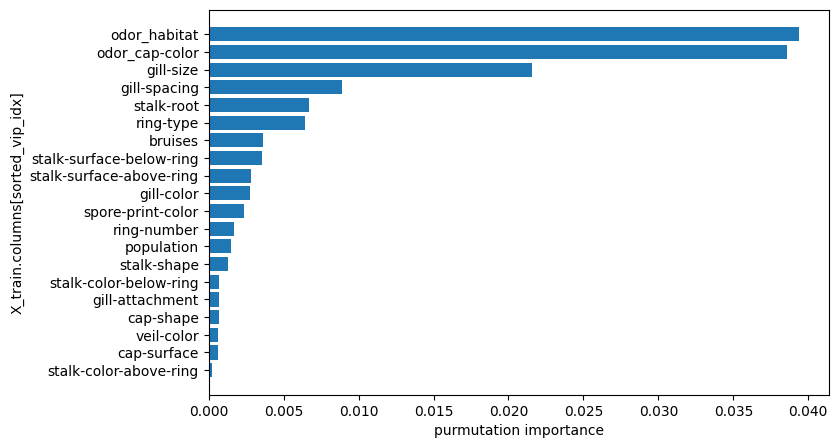

In [406]:
#sort and plot
fig, ax = plt.subplots()
sorted_vip_idx = abs(cnb_vip.importances_mean).argsort()
plt.barh(range(len(sorted_vip_idx)), abs(cnb_vip['importances_mean'][sorted_vip_idx]))

plt.ylabel('X_train.columns[sorted_vip_idx]')
plt.xlabel('purmutation importance')

ax.set_yticks(range(len(sorted_vip_idx)))
ax.set_yticklabels(X_train.columns[sorted_vip_idx])
plt.rcParams["figure.figsize"] = [10, 6]



### Performance Metrics

In [407]:
print(classification_report(y_test, cnb_grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           e       0.95      1.00      0.97      1052
           p       1.00      0.95      0.97       979

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031



              precision    recall  f1-score   support

           e       0.95      1.00      0.97      1052
           p       1.00      0.95      0.97       979

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031



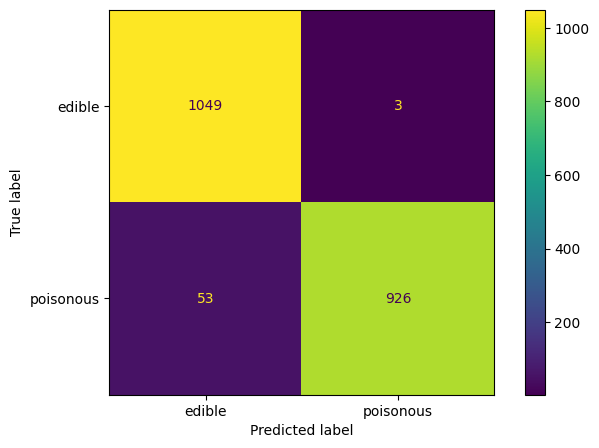

In [408]:
print(classification_report(y_test, cnb_grid_search.best_estimator_.predict(X_test)))
cnb_cm = confusion_matrix(y_test, cnb_grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cnb_cm,
                               display_labels=['edible', 'poisonous'])
plt.rcParams["figure.figsize"] = [8, 5]
disp.plot()

plt.show()

### ROC Curve

In [409]:
y_pred = cnb_grid_search.best_estimator_.predict_proba(X_test)
y_pred = y_pred[:,1]
y_true_ohe = ohe.fit_transform(y_test)
y_test_binary_cnb = np.argmax(y_true_ohe.values, axis=1)

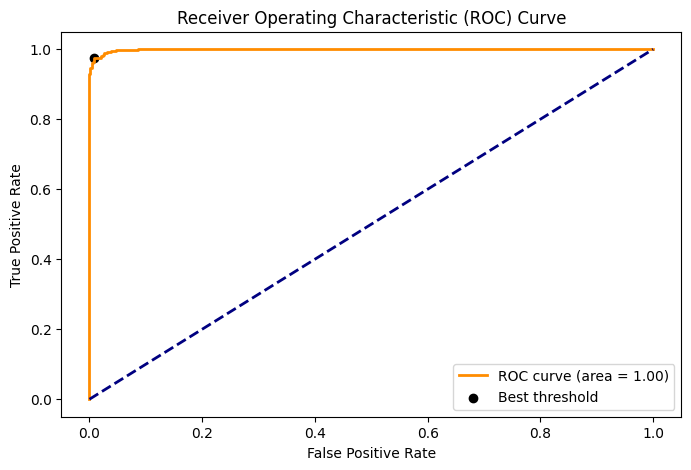

Area under the ROC curve (AUC): 0.9989902010665029


In [410]:
fpr, tpr, thresholds = roc_curve(y_test_binary_cnb, y_pred)
net_gain = tpr - fpr
ix = np.argmax(net_gain)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.rcParams["figure.figsize"] = [8, 5]
plt.show()

roc_auc = auc(fpr, tpr)
print("Area under the ROC curve (AUC):", roc_auc)

### Precision-Recall Curve

Best Threshold=0.177322 
f1 score=0.983


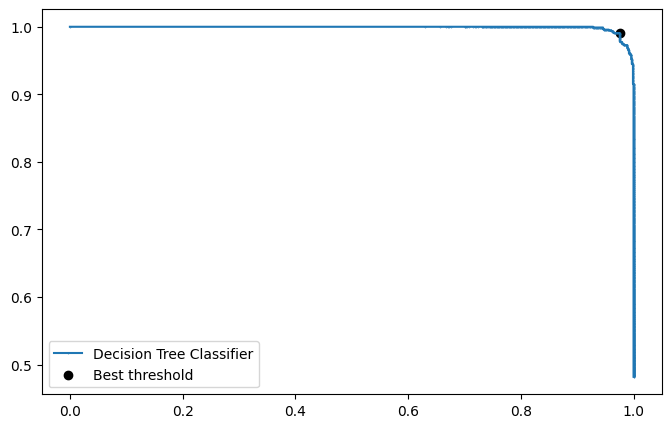

In [411]:
precision, recall, thresholds = precision_recall_curve(y_test_binary_cnb, y_pred)
f1 = 2 * ((precision * recall) / (precision + recall))
ix = np.argmax(f1)

print('Best Threshold=%f \nf1 score=%.3f' % (thresholds[ix], f1[ix]))

plt.plot(recall, precision, marker='.', label='Decision Tree Classifier', markersize= 0.5)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best threshold')

plt.legend()
plt.show()

## _Model 4_: Multinomial Naive Bayes

### Model Pipeline

In [412]:
# Define the pipeline with preprocessing and OneHotEncoder and model
pipe = Pipeline(steps=[
    ('preprocessor', preproc),  # Preprocessing steps
    ('mdl', MultinomialNB())
])


with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'bruises', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population', 'odor_habitat',
                                                   'odor_cap-color'])])),
                ('mdl', MultinomialNB())])

### Cross-Validation and Hyperparameter Tuning

In [413]:
mnb_tuning_grid = {
    'mdl__alpha'     : [0.5, 1.0, 1.5, 2.0, 5],
    'mdl__fit_prior' : [True, False] }
mnb_grid_search = GridSearchCV(pipe, param_grid = mnb_tuning_grid, cv = 5, return_train_score=True)
mnb_tuning_grid

{'mdl__alpha': [0.5, 1.0, 1.5, 2.0, 5], 'mdl__fit_prior': [True, False]}

In [414]:
mnb_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['cap-shape',
                                                                          'cap-surface',
                                                                          'bruises',
                                                                          'gill-attachment',
                                                                          'gill-spacing',
                                                                          'gill-size',
                                                                          'gill-color',
                                                                          'stalk-shape',
                                                                          'stalk-root',
                                                                          'stalk-surface-above-ring',
                                                                          'stalk-surface-below-ring',
                                                                          'stalk-color-above-ring',
                                                                          'stalk-color-below-ring',
                                                                          'veil-color',
                                                                          'ring-number',
                                                                          'ring-type',
                                                                          'spore-print-color',
                                                                          'population',
                                                                          'odor_habitat',
                                                                          'odor_cap-color'])])),
                                       ('mdl', MultinomialNB())]),
             param_grid={'mdl__alpha': [0.5, 1.0, 1.5, 2.0, 5],
                         'mdl__fit_prior': [True, False]},
             return_train_score=True)

### Final Fit

In [415]:
mnb_grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'bruises', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population', 'odor_habitat',
                                                   'odor_cap-color'])])),
                ('mdl', MultinomialNB(alpha=0.5, fit_prior=False))])

### Variable Importance

In [416]:
mnb_vip = permutation_importance(mnb_grid_search.best_estimator_, X_test, y_test)
mnb_vip.importances_mean

array([-1.67405219e-03,  1.96947317e-04, -7.87789266e-04,  9.84736583e-05,
        1.08321024e-03,  4.52978828e-03,  1.87099951e-03,  2.95420975e-04,
        8.86262925e-04,  7.87789266e-04, -4.92368291e-04,  3.54505170e-03,
        5.21910389e-03,  8.86262925e-04, -1.47710487e-03,  7.87789266e-04,
        2.46184146e-03,  5.61299852e-03,  4.51994092e-02,  4.87444609e-02])

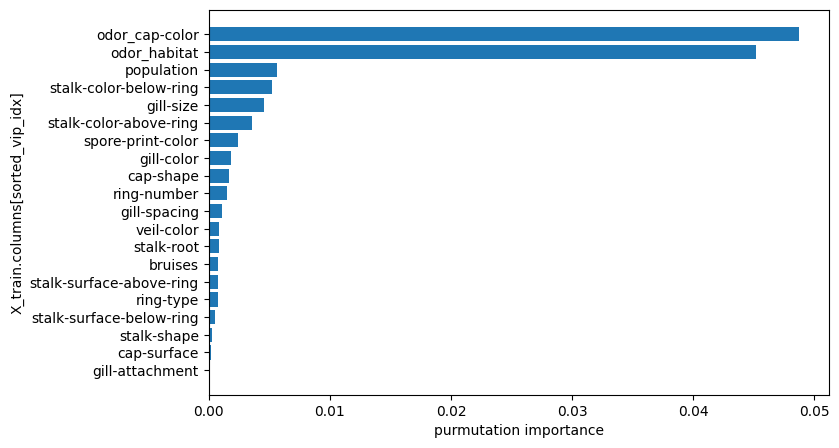

In [417]:
#sort and plot
fig, ax = plt.subplots()
sorted_vip_idx = abs(mnb_vip.importances_mean).argsort()
plt.barh(range(len(sorted_vip_idx)), abs(mnb_vip['importances_mean'][sorted_vip_idx]))

plt.ylabel('X_train.columns[sorted_vip_idx]')
plt.xlabel('purmutation importance')

ax.set_yticks(range(len(sorted_vip_idx)))
ax.set_yticklabels(X_train.columns[sorted_vip_idx])
plt.rcParams["figure.figsize"] = [10, 6]



### Performance Metrics

In [418]:
print(classification_report(y_test, mnb_grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           e       0.98      1.00      0.99      1052
           p       1.00      0.98      0.99       979

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



              precision    recall  f1-score   support

           e       0.95      1.00      0.97      1052
           p       1.00      0.95      0.97       979

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031



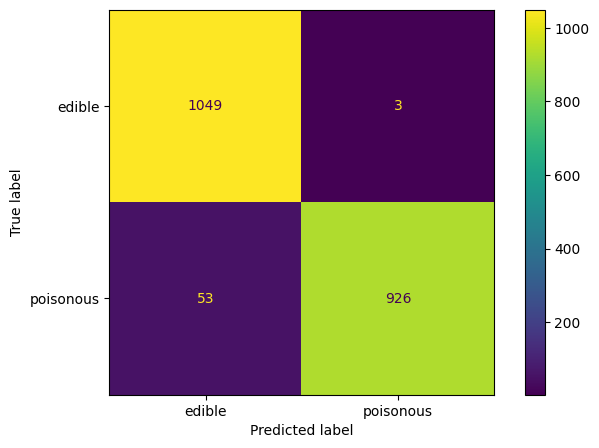

In [419]:
print(classification_report(y_test, cnb_grid_search.best_estimator_.predict(X_test)))
cnb_cm = confusion_matrix(y_test, cnb_grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cnb_cm,
                               display_labels=['edible', 'poisonous'])
plt.rcParams["figure.figsize"] = [8, 5]
disp.plot()

plt.show()

### ROC Curve

In [420]:
y_pred = mnb_grid_search.best_estimator_.predict_proba(X_test)
y_pred = y_pred[:,1]
y_true_ohe = ohe.fit_transform(y_test)
y_test_binary_mnb = np.argmax(y_true_ohe.values, axis=1)

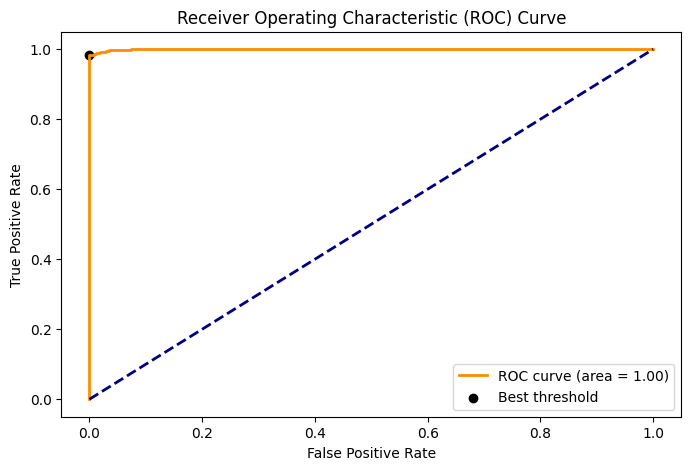

Area under the ROC curve (AUC): 0.9995795740978805


In [421]:
fpr, tpr, thresholds = roc_curve(y_test_binary_mnb, y_pred)
net_gain = tpr - fpr
ix = np.argmax(net_gain)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.rcParams["figure.figsize"] = [8, 5]
plt.show()

roc_auc = auc(fpr, tpr)
print("Area under the ROC curve (AUC):", roc_auc)

### Precision-Recall Curve

Best Threshold=0.102826 
f1 score=0.991


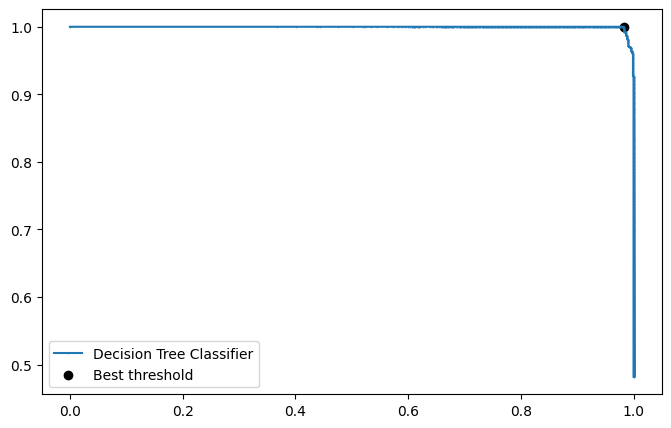

In [422]:
precision, recall, thresholds = precision_recall_curve(y_test_binary_mnb, y_pred)
f1 = 2 * ((precision * recall) / (precision + recall))
ix = np.argmax(f1)

print('Best Threshold=%f \nf1 score=%.3f' % (thresholds[ix], f1[ix]))

plt.plot(recall, precision, marker='.', label='Decision Tree Classifier', markersize= 0.5)
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best threshold')

plt.legend()
plt.show()

# Model Results

## Preliminary Result Analysis
> The preliminary results provided valuable insights into the performance of various models. Notably, the Categorical Naive Bayes (CNB) model demonstrated a strong F1 score of 0.969, exceeding expectations for a model often considered simpler compared to ensemble methods like Gradient Boosting, Linear Regression, Random Forest, and Decision Tree. Additionally, the Multinomial Naive Bayes (MNB) model performed admirably, achieving an F1 score of 0.981, further diversifying the pool of high-performing models.

>While it was anticipated that models like Random Forest, known for their capability to capture complex relationships, would perform exceptionally well, its perfect F1 score of 1.000 raised concerns about potential overfitting. Linear Regression also achieved a perfect F1 score of 1.000, aligning closely with expectations of a model assuming linear relationships between features and the target variable.




##Model Performance Ranking
> - __Best__: Categorical Naive Bayes - F1 score 0.969, Accuracy 93%
- __Close Second__: Multinomial Naive Bayes - F1 score 0.981, Accuracy 96%
- __Worst (Tied)__: Linear Regression and Random Forest - both achieved perfect F1 scores 1.000 and accuracy of 100%

## Feature Engineering Results

### Results without Feature Engineering

> **Linear Regression**  
Accuracy:  100%      
F1 Score:
*   Edible: 100%
*   Poisonous: 100%

---

> **Random Forest Classifier**  
Accuracy:  100%      
F1 Score:
*   Edible: 100%
*   Poisonous: 100%

---
> **Categorical Naive Bayes**  
Accuracy:  93%      
F1 Score:
*   Edible: 94%
*   Poisonous: 93%

---

> **Multinomial Naive Bayes**  
Accuracy:  96%      
F1 Score:
*   Edible: 96%
*   Poisonous: 98%


### Results with Feature1 - odor_habitat

> **Linear Regression**  
Accuracy:  100%      
F1 Score:
*   Edible: 100%
*   Poisonous: 100%

---

> **Random Forest Classifier**  
Accuracy:  100%      
F1 Score:
*   Edible: 100%
*   Poisonous: 100%

---
> **Categorical Naive Bayes**  
Accuracy:  92%      
F1 Score:
*   Edible: 93%
*   Poisonous: 92%

---

> **Multinomial Naive Bayes**  
Accuracy:  95%      
F1 Score:
*   Edible: 96%
*   Poisonous: 95%


 > **Evaluations of Feature1**:  
   * __Linear Regression and Random Forest Classifier__:   
   Both models achieved perfect accuracy and F1 scores, indicating that the inclusion of the odor_habitat feature alone provided sufficient information for them to make accurate predictions.    
   * __Categorical Naive Bayes and Multinomial Naive Bayes__:  
   While the accuracy remained high, there was a slight decrease in the F1 score for both edible and poisonous classes compared to the Linear Regression and Random Forest Classifier models.

### Results with Feature2 - odor_capcolor

> **Linear Regression**  
Accuracy:  100%      
F1 Score:
*   Edible: 100%
*   Poisonous: 100%

---

> **Random Forest Classifier**  
Accuracy:  100%      
F1 Score:
*   Edible: 100%
*   Poisonous: 100%

---
> **Categorical Naive Bayes**  
Accuracy:  92%      
F1 Score:
*   Edible: 93%
*   Poisonous: 91%

---

> **Multinomial Naive Bayes**  
Accuracy:  95%      
F1 Score:
*   Edible: 95%
*   Poisonous: 95%


> **Evaluations of Feature 2:**
  * __Linear Regression and Random Forest Classifier__:  
  Similar to the previous scenario, both models maintained perfect accuracy and F1 scores, suggesting that the addition of the odor_cap-color feature alone did not significantly impact their performance.
  * __Categorical Naive Bayes and Multinomial Naive Bayes__:  
  There was a slight decrease in accuracy and F1 score for both classes with the addition of the odor_cap-color feature, although the decrease was more pronounced in the Categorical Naive Bayes model.

### Results with both Feature 1 and 2 - odor_habitat and odor_cap-color

> **Linear Regression**  
Accuracy:  100%      
F1 Score:
*   Edible: 100%
*   Poisonous: 100%

---

> **Random Forest Classifier**  
Accuracy:  100%      
F1 Score:
*   Edible: 100%
*   Poisonous: 100%

---
> **Categorical Naive Bayes**  
Accuracy:  97%      
F1 Score:
*   Edible: 97%
*   Poisonous: 97%

---

> **Multinomial Naive Bayes**  
Accuracy:  99%      
F1 Score:
*   Edible: 99%
*   Poisonous: 99%


> **Results of Both Feature1 and Feature2 - odor_habitat and odor_cap-color:**
 * __Linear Regression and Random Forest Classifier__:  
 The inclusion of both features led to no change in the performance of these models, as they still achieved perfect accuracy and F1 scores.
 * __Categorical Naive Bayes__:  
 There was a slight increase in accuracy and F1 score for both classes compared to the scenarios where only one feature was included, indicating that combining multiple features provided additional predictive power for this model.
 * __Multinomial Naive Bayes__:  Similar to Categorical Naive Bayes, there was a slight improvement in accuracy and F1 score for both classes with the inclusion of both features, suggesting that combining features enhanced the model's performance.

## Result Summary
> In summary, while both CNB and MNB emerged as top performers in terms of F1 score and accuracy, the unexpected perfect F1 scores of Random Forest models highlight the need for further investigation into potential overfitting issues. It's essential to conduct additional fine-tuning and validation on unseen data to ensure the selected models' robustness and generalization ability. Additionally, exploring techniques to mitigate overfitting, such as regularization or feature selection, could improve the performance and generalization ability of the models.

